In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-turbine-scada-dataset/T1.csv


<h1 id="basics" style="font-family:verdana;"> 
    <center> Windturbine - Wirkleistungsvorhersage ML Model
    </center>
</h1>
<div style="width:100%;text-align: center;"> <img align=middle src="https://media4.giphy.com/media/3MbRNvfnMyUJeKGlsw/giphy.gif?cid=ecf05e47wbvqnbef0bgfkmlyu6jc7o7zy01c4fk1b9bmdycp&ep=v1_gifs_search&rid=giphy.gif&ct=g" alt="Wind Turbine" style="height:500px;margin-top:1rem;"> </div>

'

# Hauptthemen der Studie

1. [Der Zweck der Studie](#Abschnitt-eins)
2. [Die Daten verstehen](#Abschnitt-zwei)
3. [Datenaufbereitung und EDA](#Abschnitt-drei)
4. [Feature Engineering](#Abschnitt-vier)
5. [Datenbereinigung](#Abschnitt-fünf)
6. [Modellierung](#Abschnitt-sechs)
    - [Modellvergleich](#Abschnitt-sieben)
    - [LGBM Modeling](#Abschnitt-acht)
7. [Feature Engineering](#Abschnitt-neun) 
8. [Vorhersage](#Abschnitt-zehn)
9. [Fazit](#Abschnitt-elf)
10. [Kontakt](#Abschnitt-zwölf)

<a id="Abschnitt-eins"></a>
# 1.Der Zweck der Studie

Ziel dieser Studie ist es, Machine-Learning-Modelle zur Vorhersage der Wirkleistung einer Windturbine auf der Grundlage eines seit 2018 gesammelten privaten Datensatzes zu nutzen. Der Datensatz enthält Informationen wie Windgeschwindigkeit und Datum/Uhrzeit. Die Hauptziele sind wie folgt:

1. **Modellauswahl**: Bewerten und bestimmen Sie das am besten geeignete Machine-Learning-Modell zur Vorhersage der Wirkleistung unter Linearer Regression (LR), Entscheidungsbaum (CART), Random Forest (RF), Gradient Boosting (GBM), XGBoost (XGBoost), LightGBM und CatBoost.

2. **Modelltraining**: Trainieren Sie das ausgewählte Modell anhand des Datensatzes unter Verwendung von Windgeschwindigkeit und Datum/Uhrzeit als unabhängige Variablen.

3. **Vorhersageergebnisse**: Erhalten Sie Vorhersagen für die Wirkleistung der Windturbine mithilfe des trainierten Modells.

4. **Datensatzübersicht**: Erkunden Sie den Datensatz und konzentrieren Sie sich dabei insbesondere auf den Zeitraum ab 2018.

Diese Studie soll Einblicke in die Leistung verschiedener maschineller Lernmodelle zur Vorhersage der Wirkleistung geben und wertvolle Informationen für die Optimierung von Windkraftanlagen und die Prognose der Energieproduktion liefern.



<div style="width:100%;text-align: center;"> <img align=middle src="https://www.mdpi.com/energies/energies-16-00180/article_deploy/html/images/energies-16-00180-g002-550.jpg" alt="Active Power" style="height:500px;margin-top:1rem;"> </div> 

<a id="Abschnitt-zwei"></a>

## 2. Die Daten verstehen

Um mit unserer Analyse zu beginnen, müssen wir zunächst die erforderlichen Bibliotheken importieren und den Datensatz lesen. Dadurch stellen wir sicher, dass wir über die erforderlichen Tools und den Zugriff auf den Datensatz verfügen, um ein umfassendes Verständnis zu erhalten.

In [5]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from datetime import datetime
%matplotlib inline
from windrose import WindroseAxes
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.close('all')
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model, ensemble, metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [4]:
#!pip install windrose

In [8]:
df = pd.read_csv("/kaggle/input/wind-turbine-scada-dataset/T1.csv")

df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [11]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
count,47033.000000,47033.000000,47033.000000
mean,1404.913344,7.703595,123.721298
std,1309.208087,4.270305,92.716744
min,-2.471405,0.000000,0.000000
25%,166.337494,4.455847,50.032009
50%,987.410278,7.285465,73.558273
75%,2611.777100,10.477190,201.470505
max,3618.732910,25.206011,359.997589


In [9]:
# In dieser Studie wird die Variable der theoretischen Leistungskurve ignoriert.

df = df.drop('Theoretical_Power_Curve (KWh)', axis=1)

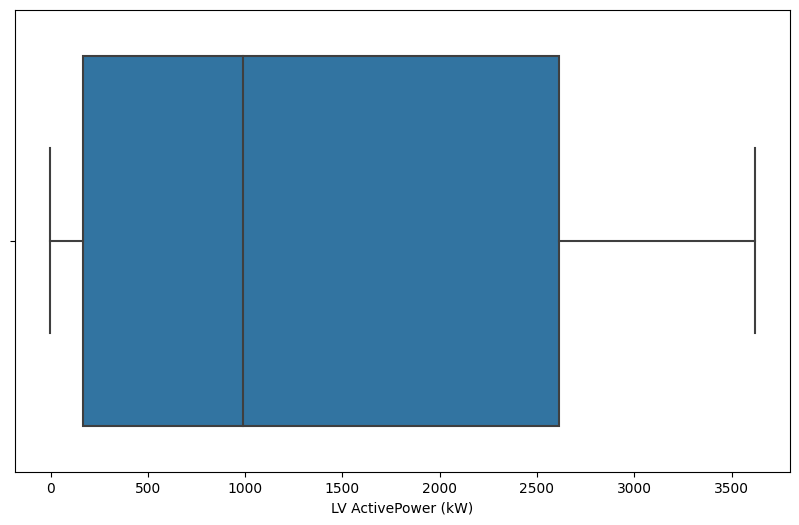

In [10]:
# Aktualisieren Sie df, um Zeilen auszuschließen, bei denen die Windgeschwindigkeit zwischen 3 und 26 liegt und LV ActivePower 0 ist
df = df[(df['Wind Speed (m/s)'] <= 3) | (df['Wind Speed (m/s)'] >= 26) | (df['LV ActivePower (kW)'] != 0)]

# Erstellen Sie ein Boxplot für die Windgeschwindigkeit
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['LV ActivePower (kW)'], ax=ax)
plt.show()

The check_df function provides a concise summary of a dataframe. It includes information on its shape, data types, the first and last three rows, missing values, and key quantiles. This quick overview is essential for understanding the dataset's structure, identifying potential issues, and informing data exploration decisions.

In [12]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(47033, 4)
##################### Types #####################
Date/Time               object
LV ActivePower (kW)    float64
Wind Speed (m/s)       float64
Wind Direction (°)     float64
dtype: object
##################### Head #####################
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  Wind Direction (°)
0  01 01 2018 00:00           380.047791          5.311336          259.994904
1  01 01 2018 00:10           453.769196          5.672167          268.641113
2  01 01 2018 00:20           306.376587          5.216037          272.564789
##################### Tail #####################
              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Wind Direction (°)  
50527           84.742500  
50528           

TypeError: unsupported operand type(s) for -: 'str' and 'str'

„In unserem Datensatz untersuchen wir die folgenden Schlüsselvariablen:

1. Datum/Uhrzeit: Stellt den Zeitstempel jedes aufgezeichneten Datenpunkts dar und liefert zeitliche Informationen für die Beobachtungen.

2. LV ActivePower (kW): Gibt die tatsächlich von der Windturbine in Kilowatt erzeugte Leistung an und dient als entscheidende Kennzahl für die Energieabgabe.

3. Windgeschwindigkeit (m/s): Misst die Geschwindigkeit des auf die Turbine einwirkenden Windes, ein entscheidender Faktor, der die Energieerzeugung beeinflusst.

4. Windrichtung (°): Bezeichnet die Richtung, aus der der Wind weht und die die Turbineneffizienz und die Stromerzeugung beeinflusst.

Dieser Datensatz bietet Einblicke in die Dynamik zwischen Wetterbedingungen, Turbinenleistung und Energieabgabe und ermöglicht eine umfassende Analyse der Windenergieerzeugung. Insbesondere fehlen keine Werte und jeder Eintrag entspricht einem eindeutigen Zeitstempel, wodurch die Individualität der Beobachtungen gewährleistet wird.“

<a id="Abschnitt-drei"></a>
## 3. Datenvorbereitung und EDA

In dieser Phase liegt der Schwerpunkt auf einer umfassenden Datenvorbereitung. Ausreißer werden untersucht und, falls identifiziert, behandelt, um die Datenintegrität sicherzustellen. Darüber hinaus wird eine gründliche Untersuchung fehlender Werte durchgeführt, um geeignete Behandlungsstrategien zu entwickeln. Die Variablen werden visuell durch Diagramme erklärt, die ihre Verteilungen beleuchten, und Korrelationen zwischen ihnen werden hervorgehoben. Dieser sorgfältige Prozess gewährleistet einen robusten und gut vorbereiteten Datensatz für die anschließende Analyse.

In [13]:
# Erfassen von Variablentypen

def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

  # cat_cols + num_cols + cat_but_car = değişken sayısı.
 # num_but_cat cat_cols'ein verifizierter Benutzer.
 # Nach 3 Monaten werden die folgenden Dateien aufgelistet: cat_cols + num_cols + cat_but_car # num_but_cat wird angezeigt.

    return cat_cols, cat_but_car, num_cols

In [14]:
# # Variablentypen

cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 47033
Variables: 4
cat_cols: 0
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [15]:
# Funktion für kategoriale Variablen

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col)

count    47033.000000
mean      1404.913344
std       1309.208087
min         -2.471405
5%           0.000000
10%          0.000000
20%         61.825931
30%        290.603284
40%        589.735522
50%        987.410278
60%       1533.117773
70%       2242.722656
80%       2993.036865
90%       3540.330420
95%       3601.375977
99%       3603.623750
max       3618.732910
Name: LV ActivePower (kW), dtype: float64


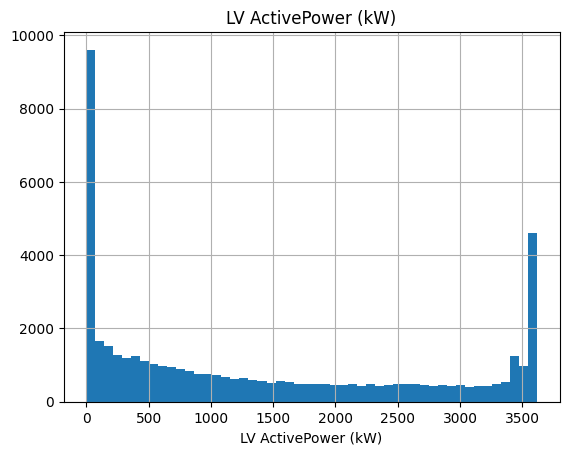

#####################################
count    47033.000000
mean         7.703595
std          4.270305
min          0.000000
5%           1.625222
10%          2.290062
20%          3.789023
30%          5.121829
40%          6.260493
50%          7.285465
60%          8.370427
70%          9.720850
80%         11.296672
90%         13.352298
95%         15.475110
99%         19.326311
max         25.206011
Name: Wind Speed (m/s), dtype: float64


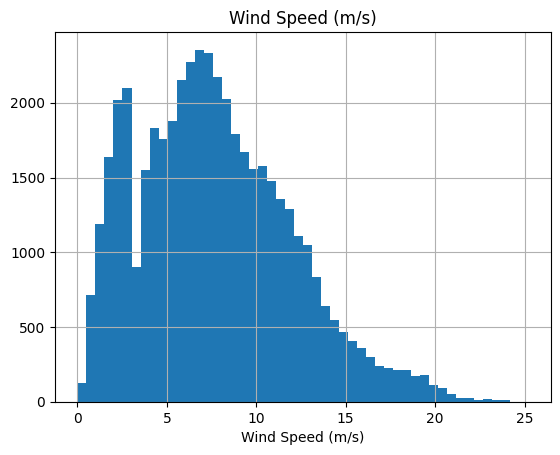

#####################################
count    47033.000000
mean       123.721298
std         92.716744
min          0.000000
5%          21.306696
10%         30.116805
20%         43.462672
30%         55.569816
40%         64.265216
50%         73.558273
60%        138.564539
70%        193.826495
80%        210.367938
90%        255.147577
95%        298.673914
99%        350.988564
max        359.997589
Name: Wind Direction (°), dtype: float64


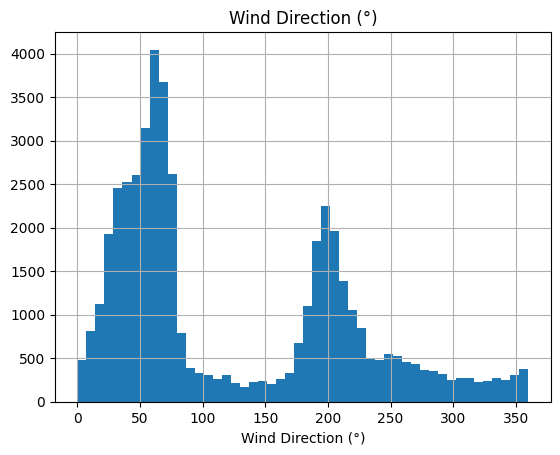

#####################################


In [16]:
# Numerische Analyse von Daten

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

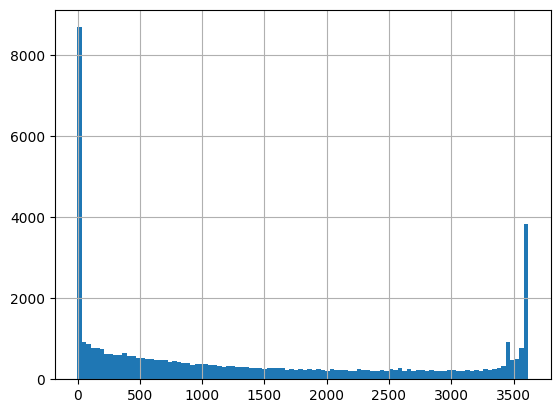

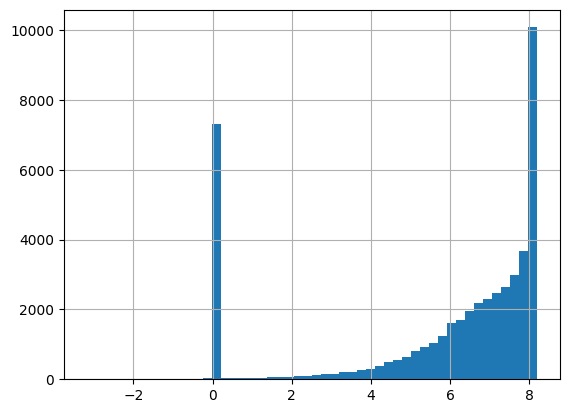

In [17]:
# Analyse der Zielvariablen

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df,"LV ActivePower (kW)",col)

# Target Variable Anaylsis
df["LV ActivePower (kW)"].hist(bins=100)
plt.show(block=True)

# Zielvariablenanalyse
np.log1p(df['LV ActivePower (kW)']).hist(bins=50)
plt.show(block=True)

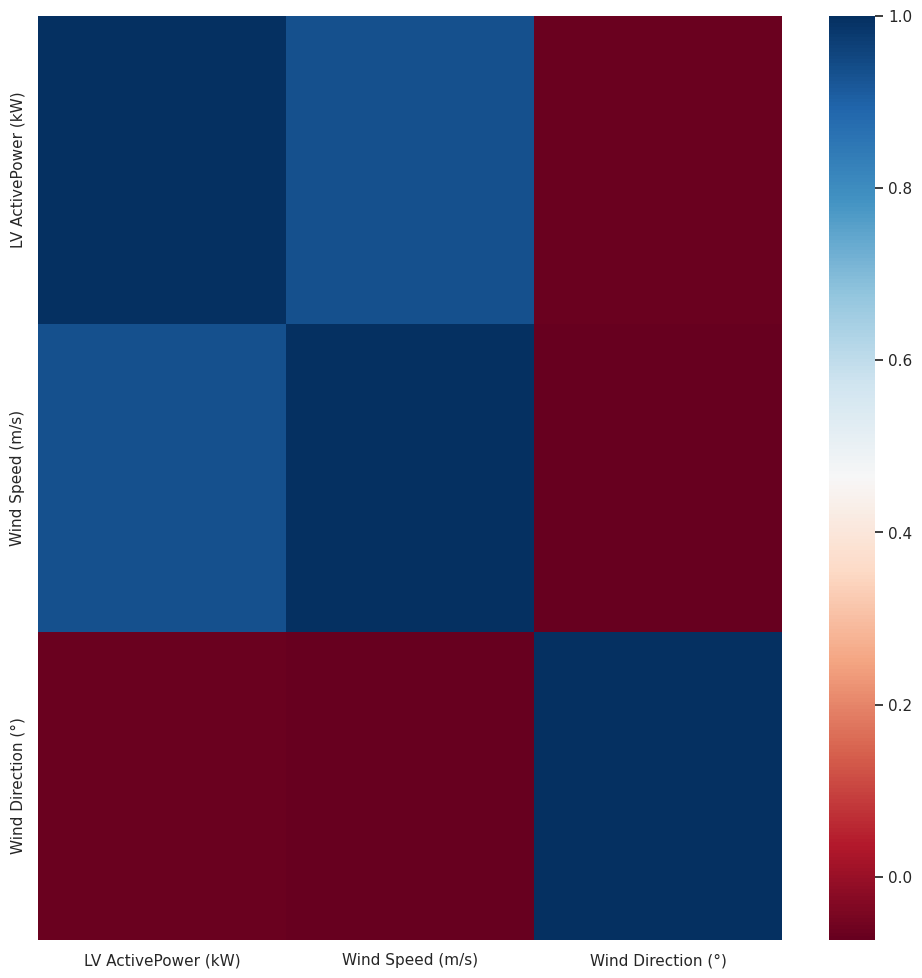

In [18]:
# Korrelationsanalyse

corr = df[num_cols].corr()
corr

# Correlation Graph
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show(block=True)

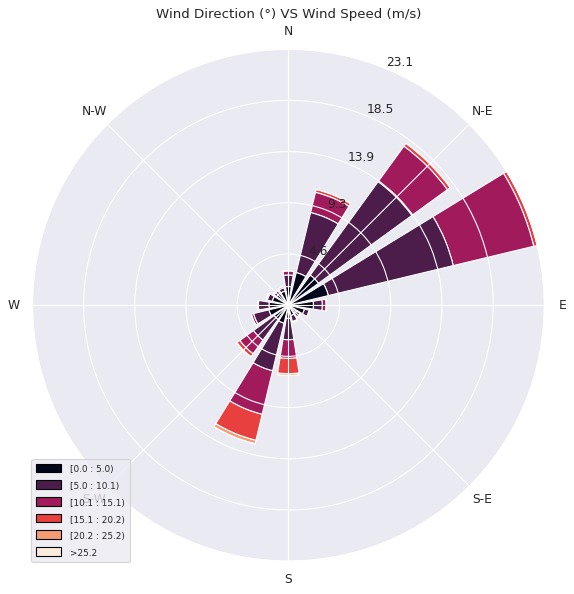

In [19]:
# Verteilung der Windrichtung

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'], df['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

<a id="Abschnitt-vier"></a>
## 4. Feature Engineering

In diesem Schritt wird die Spalte „Datum/Uhrzeit“ genutzt, um wertvolle zeitliche Informationen zu extrahieren und den Datensatz mit zusätzlichen Features anzureichern. Dazu gehören die Komponenten Jahr, Monat, Tag, Stunde und Minute, die ein detailliertes Verständnis zeitbezogener Muster ermöglichen. Darüber hinaus werden kategorische Features wie „Jahreszeit“ und „Tageszeit“ abgeleitet, um saisonale Schwankungen zu erfassen und verschiedene Tageszeiten zu unterscheiden. Dieser sorgfältige Feature-Engineering-Prozess zielt darauf ab, Machine-Learning-Modelle mit einem verbesserten zeitlichen Kontext auszustatten, damit sie Muster in der aktiven Stromerzeugung der Windturbine besser erfassen und vorhersagen können.

In [20]:
# Angenommen, df ist Ihr DataFrame mit einer Spalte „Datum/Uhrzeit“
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Extract year, month, day, hour, and minute information
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute

# Extrahieren von Saisoninformationen basierend auf dem Monat
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                 'Spring' if x in [3, 4, 5] else
                                 'Summer' if x in [6, 7, 8] else
                                 'Fall')

# Extrahieren von Tageszeitinformationen basierend auf der Stunde
df['Daytime'] = df['Hour'].apply(lambda x: 'Night' if x in [0, 1, 2, 3, 4, 5] else
                                 'Morning' if x in [6, 7, 8, 9, 10, 11] else
                                 'Afternoon' if x in [12, 13, 14, 15, 16, 17] else
                                 'Evening')

# Spalten löschen
df = df.drop(["Date/Time", "Minute"], axis=1)

# Index zurücksetzen
df = df.reset_index(drop=True)

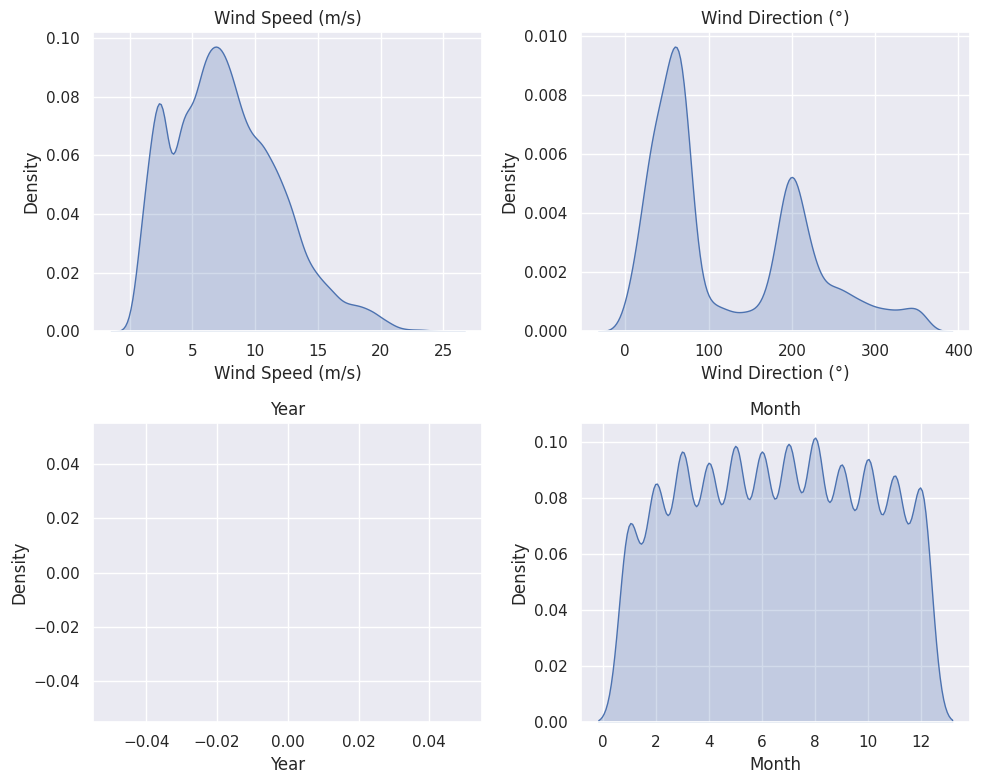

In [21]:
# Darstellung der Datenverteilung
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i+1], shade=True)
    plt.title(df.columns[i+1])
plt.tight_layout()
plt.show()

<a id="Abschnitt-fünf"></a>
## 5. Datenbereinigung

In diesem entscheidenden Schritt kümmern wir uns um die Datenqualität, indem wir Probleme im Datensatz erkennen und beheben. Fehlende Werte werden identifiziert und mithilfe geeigneter Techniken behandelt. Eventuelle Ausreißer werden sorgfältig untersucht und behandelt, um sicherzustellen, dass sie die Modellleistung nicht negativ beeinflussen. Darüber hinaus können redundante oder irrelevante Daten entfernt werden, um den Datensatz zu optimieren. Das Ziel dieses sorgfältigen Datenbereinigungsprozesses besteht darin, eine zuverlässige und konsistente Grundlage für die nachfolgende Modellierung zu schaffen und die Genauigkeit und Robustheit der maschinellen Lernmodelle zu verbessern, die zur Vorhersage der aktiven Leistung von Windkraftanlagen angewendet werden.

In [22]:
# Löschen aller Nullwerte aus den Daten
df = df.dropna()

In [23]:
# Ausreißererkennung und Anwendung

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "LV ActivePower (kW)":
      print(col, check_outlier(df, col))

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

for col in num_cols:
    df = remove_outlier(df, col)


Wind Speed (m/s) False
Wind Direction (°) False


In [24]:
# Fehlende Werte erkennen und ergänzen

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)


def quick_missing_imp(data, num_method="median", cat_length=20, target="LV ActivePower (kW)"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0] 

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n") 

    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# NACH \n Die Imputationsmethode ist „MODE“ für kategorische Variablen!")
    print(" Imputationsmethode ist '" + num_method.upper() + "' für numerische Variablen! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df, num_method="median", cat_length=17)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
# BEFORE
Series([], dtype: float64) 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Series([], dtype: float64) 




In [25]:

# Label Encoding & One-Hot Encoding

cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    for col in categorical_cols:
        unique_values = set(dataframe[col].unique())
        for value in unique_values:
            new_col_name = f"{col}_{value}"
            dataframe[new_col_name] = (dataframe[col] == value).astype(int)
    dataframe = dataframe.drop(categorical_cols, axis=1)
    return dataframe


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

Observations: 47033
Variables: 9
cat_cols: 3
num_cols: 6
cat_but_car: 0
num_but_cat: 1


<a id="Abschnitt-sechs"></a>
## 6. Modellierung

Dieser entscheidende Schritt umfasst die Auswahl und Implementierung von maschinellen Lernmodellen zur Vorhersage der aktiven Leistung von Windkraftanlagen. Zur Bewertung der Modellleistung werden strenge Bewertungsmetriken eingesetzt, um genaue und zuverlässige Vorhersagen sicherzustellen. Der durch Feature Engineering angereicherte und während der Datenaufbereitungsphase bereinigte Datensatz dient als Grundlage für das Training verschiedener Modelle, darunter Lineare Regression, Entscheidungsbaum, Random Forest, Gradient Boosting, XGBoost, LGBM und CatBoost.

Nach einem gründlichen Modellvergleich erweist sich LightGBM (LGBM) aufgrund seiner überlegenen Leistung, Effizienz und Fähigkeit, große Datensätze zu verarbeiten, als die bevorzugte Wahl. Das Gradient-Boosting-Framework von LGBM zeichnet sich durch die Erfassung komplexer Muster in zeitlichen und Umgebungsvariablen aus und trägt so zu einer verbesserten Vorhersagegenauigkeit bei. Der Modellauswahlprozess stellt sicher, dass der gewählte Algorithmus mit den spezifischen Merkmalen des Datensatzes übereinstimmt, was einen strategischen Schritt zur Erzielung robuster und zuverlässiger Vorhersagen im Bereich der erneuerbaren Energien darstellt.

<a id="Abschnitt-sieben"></a>
### 6.1 Modellvergleich

In [28]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.graph_objects as go

#df = df.drop('Wind Direction (°)', axis=1)

df = df.reset_index(drop=True)
train_df = df.loc[:len(df)*0.8]

y = train_df['LV ActivePower (kW)']
X = train_df.drop(["LV ActivePower (kW)"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_results = []

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_results.append((name, round(rmse, 4)))

# Extracting model names and corresponding RMSE values
model_names, rmse_values = zip(*rmse_results)

# Creating a bar plot using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=model_names, y=rmse_values, text=rmse_values, textposition='auto'))

fig.update_layout(
    title="RMSE Results for Regression Models",
    xaxis_title="Model",
    yaxis_title="RMSE",
)

fig.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 30101, number of used features: 9
[LightGBM] [Info] Start training from score 1257.231819
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 30101, number of used features: 10
[LightGBM] [Info] Start training from score 1367.045311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of

<a id="Abschnitt-acht"></a>
### 6.2 LGBTM-Modellierung

In [32]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.graph_objects as go

# Assuming X and y are your features and target variable

# create a LightGBM model for tuning
initial_lgb_model = lgb.LGBMRegressor(random_state=17)

# calculate the initial RMSE score using cross-validation
initial_rmse = round(np.mean(np.sqrt(-cross_val_score(initial_lgb_model, X, y, cv=5, scoring="neg_mean_squared_error"))), 2)

# define the hyperparameters to tune
param_grid = {
    "n_estimators": [200, 500],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 6]
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(initial_lgb_model, param_grid, cv=5, n_jobs=-1, verbose=True)
best_lgb_model = grid_search.fit(X, y)

# print the best hyperparameters
best_params = best_lgb_model.best_params_
print("Best Hyperparameters:", best_params)

# create the final model with the best hyperparameters
final_lgb_model = lgb.LGBMRegressor(random_state=17, **best_params).fit(X, y)

# calculate the final RMSE score using cross-validation
final_rmse = round(np.mean(np.sqrt(-cross_val_score(final_lgb_model, X, y, cv=5, scoring="neg_mean_squared_error"))), 2)

# Print RMSE values
print("Initial RMSE:", initial_rmse)
print("Final RMSE:", final_rmse)

# Plot RMSE comparison using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=["Initial RMSE", "Final RMSE"], y=[initial_rmse, final_rmse], text=[initial_rmse, final_rmse], textposition='auto'))

fig.update_layout(
    title="Comparison of Initial and Final RMSE",
    xaxis_title="RMSE Type",
    yaxis_title="RMSE Value",
)

fig.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 30101, number of used features: 9
[LightGBM] [Info] Start training from score 1257.231819
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 30101, number of used features: 10
[LightGBM] [Info] Start training from score 1367.045311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of

<a id="abschnitt-neun"></a>
## 7. Feature Engineering

Die Merkmalswichtigkeit spielt eine entscheidende Rolle beim Verständnis der Faktoren, die die Vorhersage der Wirkleistung von Windturbinen beeinflussen. Nach dem Training des LightGBM-Modells wird eine umfassende Analyse der Merkmalswichtigkeit durchgeführt. Diese Analyse quantifiziert die Auswirkungen jeder Eingabevariable auf die Vorhersageleistung des Modells.

Die Ergebnisse der Merkmalswichtigkeit heben den relativen Beitrag von Merkmalen wie Windgeschwindigkeit, Datums- und Zeitkomponenten und anderen relevanten Parametern bei der Bestimmung der Wirkleistungsabgabe der Windturbine hervor. Durch die Identifizierung und Priorisierung dieser einflussreichen Merkmale erhalten die Beteiligten wertvolle Einblicke in die zugrunde liegende Dynamik des Systems für erneuerbare Energien.

Darüber hinaus werden visuelle Darstellungen wie Merkmalswichtigkeitsdiagramme verwendet, um die Bedeutung jeder Variablen intuitiv zu vermitteln. Diese Transparenz hilft nicht nur bei der Interpretation der Modellergebnisse, sondern informiert auch zukünftige Entscheidungsprozesse im Zusammenhang mit der Optimierung und Betriebsstrategien der Windenergie. Die Erläuterung der Merkmalswichtigkeit fördert ein tieferes Verständnis des komplexen Zusammenspiels verschiedener Variablen und trägt letztendlich zur Förderung einer nachhaltigen und effizienten Energieerzeugung bei.

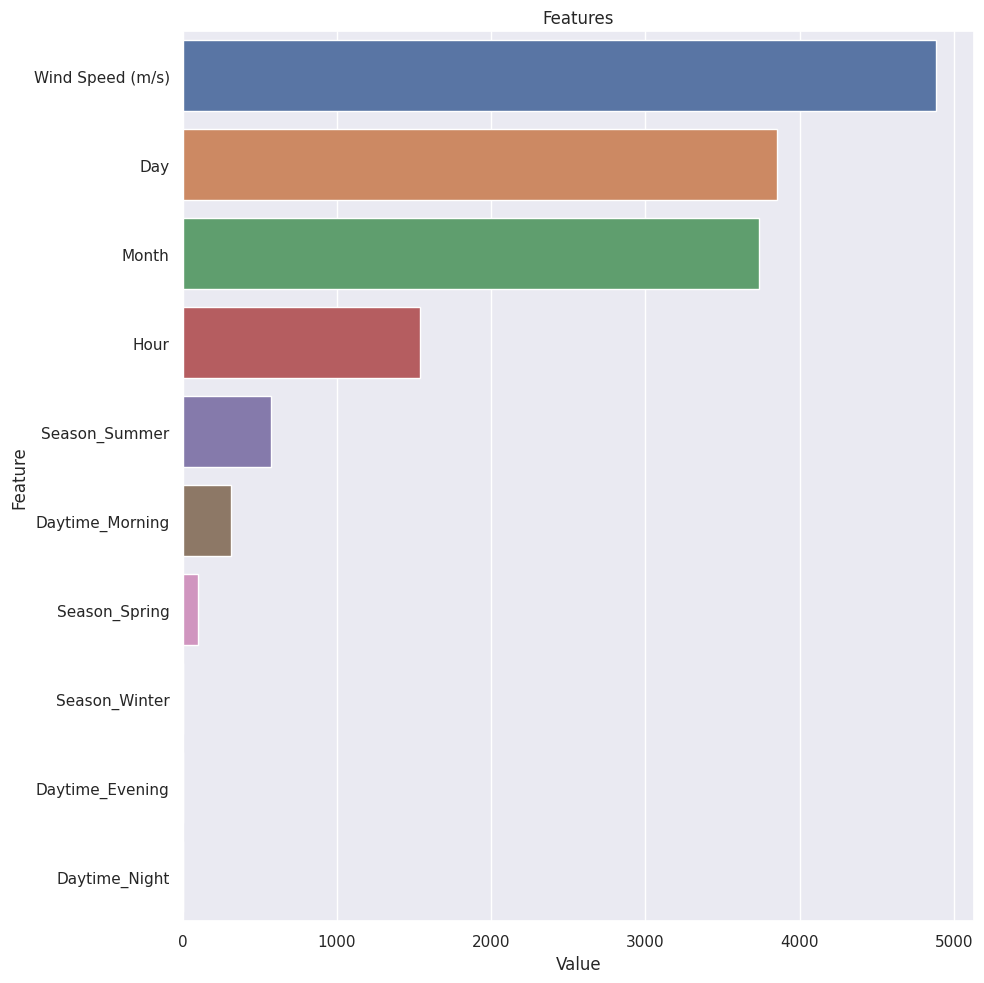

In [33]:
# feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig("importances.png")

plot_importance(final_lgb_model, X)

<a id="Abschnitt-zehn"></a>
## 8. Vorhersage

In dieser Phase wird ein robustes maschinelles Lernmodell, insbesondere der LightGBM-Algorithmus, eingesetzt, um die Wirkleistung von Windturbinen vorherzusagen. Zur Bewertung der Leistung des Modells wird ein Testdatensatz verwendet, der 20 % der Originaldaten umfasst. Das trainierte Modell nutzt Merkmale wie Windgeschwindigkeit, zeitliche Komponenten und andere relevante Parameter, um Vorhersagen über die Wirkleistungsabgabe der Windturbine zu treffen.

Die Vorhersageergebnisse werden dann mit den tatsächlichen Werten aus dem Testdatensatz verglichen, um die Genauigkeit und Wirksamkeit des Modells zu quantifizieren. Wichtige Bewertungsmetriken, einschließlich des mittleren quadratischen Fehlers (RMSE) und der Erfolgsrate, bieten eine umfassende Bewertung der Vorhersagefähigkeiten des Modells.

Diese prädiktive Analyse erleichtert nicht nur das Verständnis der Leistung des Modells bei unbekannten Daten, sondern bietet auch Einblicke in die Zuverlässigkeit und Präzision der entwickelten maschinellen Lernlösung. Die Ergebnisse dieser Vorhersagephase liefern wertvolle Informationen für Entscheidungsprozesse im Bereich der erneuerbaren Energien und helfen bei der Optimierung und effizienten Verwaltung des Betriebs von Windturbinen.

In [34]:
predicted_data = []

def predicted_results_comparison(dataframe):
    for index in dataframe.index:
        predicted_data.append(final_lgb_model.predict(dataframe.loc[index].values.reshape(1, -1))[0])

    return predicted_data

# Prepare test data
test_df = df.loc[int(len(df)*0.8):].reset_index(drop=True)
last_df = test_df.drop("LV ActivePower (kW)", axis=1)

# Generate predicted results
predicted_results = predicted_results_comparison(last_df)

# Update test_df with the predicted values and success rate
test_df["Predicted_Power"] = predicted_results
test_df["Success_Rate"] = test_df["Predicted_Power"] / test_df["LV ActivePower (kW)"]

# Plot Actual vs Predicted Power using Plotly
fig = go.Figure()

# Plot the actual LV ActivePower (kW)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['LV ActivePower (kW)'], mode='lines', name='Actual Power', line=dict(width=2)))

# Plot the predicted power
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['Predicted_Power'], mode='lines', name='Predicted Power', line=dict(dash='dash', width=2)))

# Update the layout of the plot
fig.update_layout(
    title='Actual vs. Predicted LV ActivePower (kW)',
    xaxis_title='Index',
    yaxis_title='Power (kW)',
    font=dict(size=18),
    legend=dict(font=dict(size=16), x=0.02, y=0.98),
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray')
)

# Show the plot
fig.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m


<a id="Abschnitt-elf"></a> 
## 9. Fazit

Zusammenfassend lässt sich sagen, dass diese Studie eine umfassende Untersuchung und Vorhersage der Wirkleistung von Windturbinen unter Einsatz fortschrittlicher Techniken des maschinellen Lernens durchgeführt hat. Die Anfangsphasen umfassten ein sorgfältiges Verständnis, eine sorgfältige Datenaufbereitung und eine sorgfältige Merkmalsentwicklung, um die Qualität des Datensatzes zu verbessern und ihn mit zeitlichen Erkenntnissen anzureichern. In der Modellierungsphase wurden verschiedene Algorithmen berücksichtigt, wobei sich das LightGBM-Modell als optimale Wahl für die Vorhersage der Wirkleistung von Windturbinen herausstellte. Durch eine strenge Auswertung und Vorhersage anhand eines Testdatensatzes zeigte das Modell eine robuste Leistung und erfasste komplexe Muster und Abhängigkeiten. Die Einbeziehung zeitlicher Merkmale wie Jahreszeit und Tageszeit sowie meteorologischer Parameter wie der Windgeschwindigkeit trug erheblich zur Genauigkeit des Modells bei. Die Bewertungsmetriken, einschließlich RMSE und Erfolgsrate, bestätigten die Wirksamkeit des Modells bei der Vorhersage der Wirkleistungsabgabe weiter. Dieses Vorhersagemodell hat erhebliche Auswirkungen auf den Sektor der erneuerbaren Energien und stellt ein wertvolles Instrument zur Optimierung des Betriebs von Windturbinen dar. Die aus dieser Studie gewonnenen Erkenntnisse tragen zu einem tieferen Verständnis der komplexen Dynamik bei, die die Windenergieerzeugung beeinflusst, und ebnen den Weg für fundierte Entscheidungen und nachhaltige Energiemanagementpraktiken. Während Fortschritte im maschinellen Lernen die Landschaft der erneuerbaren Energien weiterhin prägen, veranschaulicht diese Studie das Potenzial datengesteuerter Lösungen zur Verbesserung der Effizienz und Zuverlässigkeit des Betriebs von Windkraftanlagen.